# Определение перспективного тарифа для телеком-компании

***Описание проекта***
  На основе данных клиентов оператора сотовой связи необходимо проанализировать поведение клиентов и поиск оптимального тарифа

***Краткое описание данных, представленных в датасете***
   
   *Данные в датасете users*
   
    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана
    
   *Данные в датасете calls*
    
    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок
    
   *Данные в датасете messages*
   
    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение
    
   *Данные в датасете internet*
   
    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя
  
  *Данные в датасете tariffs*
  
    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

***Содержание проекта***


1. <a href='#the_destination'> Предварительный анализ данных</a>

    1.1  <a href='#the_destination1'>Загрузка необходимых библиотек</a>

    1.2. <a href='#the_destination2'>Загрузка датасета calls и предварительный анализ</a>
    
    1.3. <a href='#the_destination3'>Загрузка датасета internet и предварительный анализ</a>
    
    1.4. <a href='#the_destination4'>Загрузка датасета messages и предварительный анализ</a>
    
    1.5. <a href='#the_destination5'>Загрузка датасета tariffs и предварительный анализ</a>

    1.6. <a href='#the_destination6'>Загрузка датасета users и предварительный анализ</a>
    
    1.7 . <a href='#the_destination7'>Вывод по разделу 1</a>
    

2. <a href='#the_destination8'>Подготовка данных</a>

    2.1  <a href='#the_destination9'>Приведение данных к нужным типам</a>

    2.2. <a href='#the_destination10'>Поиск ошибок и исправление ошибок</a>
    
    
3. <a href='#the_destination11'>Анализ поведения клиентов и расчет данных для анализа</a>

    3.1  <a href='#the_destination12'>Определение количества сделанных звонков и израсходованных минут разговора в месяц</a>

    3.1.1 <a href='#the_destination13'>Анализ сделанных звонков в месяц</a>
    
    3.1.2 <a href='#the_destination14'> Анализ количества израсходованных минут разговора в месяц</a>
    
    3.2. <a href='#the_destination15'>Анализ количества отравленных сообщений по месяцам</a>
    
    3.3. <a href='#the_destination16'>Анализ объема израсходованного интернет-трафика по месяцам</a>
    
    3.4. <a href='#the_destination17'>Расчет помесячной выручки с каждого пользователя</a>
    
    3.4.1 <a href='#the_destination18'>Анализ помесячной выручки для тарифа ультра</a>
    
    3.4.2 <a href='#the_destination19'>Анализ помесячной выручки для тарифа смарт</a>
    

4. <a href='#the_destination20'>Проверка гипотез</a>

    4.1  <a href='#the_destination21'>Проверка гипотезы, что средняя выручка тарифа смарт и ультра различается</a>
    
    4.2. <a href='#the_destination22'>Проверка гипотезы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a>
    

5. <a href='#the_destination23'>Общий вывод</a>

<a id='the_destination'></a>
# 1. Предварительный анализ данных

<a id='the_destination1'></a>
## 1.1. Загрузка необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st
import datetime as dt
import numpy as np

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

<a id='the_destination2'></a>
## 1.2. Загрузка датасета calls и предварительный анализ

In [2]:
calls_data = pd.read_csv('/datasets/calls.csv')

calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
display(calls_data.head(10))
# Создание свобдной таблицы для проверки наличия пользователей с нулевым количеством минут 
#за год и более чем 400000 (количество минут в годе при учете 7 часов сна)
print('\033[1m' + 'Таблица с сгруппированными по id данными о звонках'+'\033[0m')
calls_pivot = calls_data.pivot_table(index=['user_id'], values='duration', aggfunc= {'mean', 'sum'})
display(calls_pivot.sort_values(by='sum'))
print('\033[1m' + 'Пользователь с минимальным количеством минут'+'\033[0m')
display(calls_data.query('user_id == 1257').sort_values(by='call_date'))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Таблица с сгруппированными по id данными о звонках


,mean,sum
user_id,,
1257,4.492143,62.89
1016,5.742000,114.84
1373,5.423333,130.16
1442,6.440357,180.33
1141,5.500278,198.01
...,...,...
1196,6.616194,8204.08
1453,6.743993,9711.35
1375,6.895622,10757.17


Пользователь с минимальным количеством минут


,id,call_date,duration,user_id
100613,1257_10,2018-06-20,0.00,1257
100606,1257_3,2018-06-26,18.49,1257
100610,1257_7,2018-06-27,15.98,1257
100608,1257_5,2018-07-21,0.00,1257
100614,1257_11,2018-08-12,0.00,1257
100603,1257_0,2018-08-13,0.00,1257
100612,1257_9,2018-09-21,0.00,1257
100605,1257_2,2018-10-02,14.16,1257
100609,1257_6,2018-10-19,0.90,1257
100616,1257_13,2018-11-07,5.42,1257


В данных с информацией по звонкам нет пропущенных значений, есть нулевые значения, что вероятно говорит о сорвавшемся звонке или сброшенном вызове, но для абонентов в целом за год пользования минимальное значение минимальное значение в год не является нулевым. Минимальное количество минут в году 63, максимальное - 12258 (33 минуты в день), что вполне может соответствовать реальности, с учетом того, что не все пользователи приступили к пользованию тарифом с начала года.
Так пользователь с наименьшим количеством минут начал пользоваться номером в начале года и практически не совершал звонков, что может говорить также и о том, что вероятно этот номер является для него не основным и приобретен он для пользования интернетом или умными устройствами.
Надо отметить, что user_id представлен в виде целочисленного значения, но его желательно перевести в вид строк.

<a id='the_destination3'></a>
## 1.3. Загрузка датасета internet и предварительный анализ

In [4]:
internet_data = pd.read_csv('/datasets/internet.csv')

internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
display(internet_data.tail(10))

print('\033[1m' + 'Пользователь с минимальным количеством минут'+'\033[0m')
display(internet_data.query('user_id == 1257').sort_values(by='session_date'))


,Unnamed: 0,id,mb_used,session_date,user_id
149386,149386,1499_147,0.00,2018-10-21,1499
149387,149387,1499_148,268.19,2018-11-13,1499
149388,149388,1499_149,778.68,2018-11-24,1499
149389,149389,1499_150,273.98,2018-11-20,1499
149390,149390,1499_151,752.72,2018-10-11,1499
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


Пользователь с минимальным количеством минут


,Unnamed: 0,id,mb_used,session_date,user_id
76684,76684,1257_195,574.01,2018-06-17,1257
76511,76511,1257_22,1013.38,2018-06-18,1257
76678,76678,1257_189,1012.93,2018-06-18,1257
76499,76499,1257_10,770.50,2018-06-18,1257
76597,76597,1257_108,623.07,2018-06-18,1257
...,...,...,...,...,...
76613,76613,1257_124,134.52,2018-12-30,1257
76622,76622,1257_133,362.19,2018-12-30,1257
76524,76524,1257_35,286.85,2018-12-31,1257
76608,76608,1257_119,965.57,2018-12-31,1257


Для выборки данных по интернет трафику также характерно отсуствие пропущенных значений. User_id также представлен в целочисленном виде, что необходимо изменить на следующем этапе. 
Также была осуществлена проверка гипотезы об активном интернет трафика пользователя с минимальным количеством звонков - данные таблицы по интернет-трафику подтдверждают это.

<a id='the_destination4'></a>
## 1.4 Загрузка датасета messages и предварительный анализ

In [6]:
messages_data = pd.read_csv('/datasets/messages.csv')

messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
display(messages_data.head(10))

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


В данных о сообщениях целесообразно добавить столбец с количеством пересланных смс сообщений и перевести тип данных user_id в строковый.

<a id='the_destination5'></a>
## 1.5 Загрузка датасета tariffs и предварительный анализ

In [8]:
tariffs_data = pd.read_csv('/datasets/tariffs.csv')

tariffs_data.info()

tariffs_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<a id='the_destination6'></a>
## 1.6 Загрузка датасета users и предварительный анализ

In [9]:
users_data = pd.read_csv('/datasets/users.csv')

users_data.info()

users_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [10]:
# Прoверим датасет на грубые ошибки по возрасту 
print('Количество пользователей моложе 18', users_data.query('age< 18')['age'].count())
print('Количество пользователей старще 100', users_data.query('age > 100')['age'].count())

Количество пользователей моложе 18 0
Количество пользователей старще 100 0


В данных всего 500 пользователей - на следующем этапе мы должны проверить соответствие количества пользователей и информации в разных датасетах.
В графе churn_date только 38 не-NaN элементов, это связано с тем, что большинство контрактов еще действующие. Заполнять пока мы их не будем, оставив NaN значения.

<a id='the_destination7'></a>
## 1.7 Вывод по разделу 1

В первом разделе открыли и просмотрели информацию о данных в датасетах. Во всех датасетах нужно осуществить замену Int64 типа столбца users_id на object, чтобы проще было обрабатывать и группировать информацию.
Необходимо добавить столбец с количеством сообщений в датасет с информацией по сообщениям. 
Нулевые значения звонков пока было принято решение оставить неизменными, для упрощения обработки данных.

<a id='the_destination8'></a>
# 2. Подготовка данных

<a id='the_destination9'></a>
## 2.1. Приведение данных к нужным типам

Для удобства приведения данных в столбце 'user_id' разных датасетов к одному виду - замена осуществляется в цикле. Также осуществим замену типа данных для дат.

In [11]:
# замена типа данных
list = [calls_data, internet_data, messages_data, users_data]
list_of_names = ['calls_data', 'internet_data', 'messages_data', 'users_data']
for element in list:
    element['user_id'] = element['user_id'].astype('object')

#замены типа данных для даты
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y.%m.%d')
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y.%m.%d')
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y.%m.%d')
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y.%m.%d')


print('\n','\033[1m' +  'Проверка замены типа данных'+'\033[0m')
calls_data.info()    

i=0
for element in list:
    element['user_id'] = element['user_id'].astype('object')
    print('Длина списка уникальных значений id пользователей для датасета',list_of_names[i] , len(element['user_id'].unique()))
    i+=1


 Проверка замены типа данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.2+ MB
Длина списка уникальных значений id пользователей для датасета calls_data 492
Длина списка уникальных значений id пользователей для датасета internet_data 497
Длина списка уникальных значений id пользователей для датасета messages_data 426
Длина списка уникальных значений id пользователей для датасета users_data 500


Была обнаружена инетересная особенность - длина уникальных списков user_data не одинакова, то есть в списках есть отличные от остальных списков пользователи, по которым нет информации в других датасетах. Для удобства обработки данных мы создадим единый датасет, где оставим 426 одинаковых пользователей и будем пользоваться им, когда речь будет идти об анализе общей динамики, в вопросах, где нет необходимости в проверке общих данных целесообразно пользоваться отдельными датасетами.

<a id='the_destination10'></a>
## 2.2 Поиск ошибок и исправление ошибок

Для начала было осуществлено удаление дубликатов в каждом из существующих датасетов. Затем был осуществлен поиск user_id, которые не повторяются для датасетов при помощи написанной на базе метода not in функции show_the_infiltrators. После этого были сформированы новые датасеты без соответствующих id пользователей и сформирована единая таблица при помощи метода merge. 

In [12]:
# поиск дубликатов
i = 0
for element in list:
    print('Количество дубликатов для датасета', list_of_names[i], element.duplicated().sum())
    i += 1


array_calls_data = calls_data['user_id'].unique()
array_internet_data = internet_data['user_id'].unique()
array_messages_data = messages_data['user_id'].unique()
array_users_data = users_data['user_id'].unique()
list_of_arrays = [array_calls_data, array_internet_data, array_messages_data, array_users_data]
    
list_of_infiltrators = []

def show_the_infiltrators(array1, array2):
    global list_of_infiltrators
    for element in array1:
        if (element not in array2) and (element not in list_of_infiltrators):
            list_of_infiltrators.append(element)
    # проходим цикл по второму массиву, так как длина у массивов разная!
    for element in array2:
        if (element not in array1) and (element not in list_of_infiltrators):
            list_of_infiltrators.append(element)
    return list_of_infiltrators

for i in range(3):
    show_the_infiltrators(list_of_arrays[i], list_of_arrays[i+1])

print('\n', 'Массив номеров пользователей не повторяющихся во всех датафреймах', '\n')
print(list_of_infiltrators)

calls_data_upd = calls_data.query('user_id not in @list_of_infiltrators')
internet_data_upd = internet_data.query('user_id not in @list_of_infiltrators')
messages_data_upd = messages_data.query('user_id not in @list_of_infiltrators')
users_data_upd = users_data.query('user_id not in @list_of_infiltrators')

# Объединение датафреймов
total_data = calls_data_upd.merge(messages_data_upd, how='outer')
total_data = total_data.merge(internet_data_upd, how='outer')
total_data = total_data.merge(users_data_upd, how='outer')

print()
display(total_data.tail(10))

Количество дубликатов для датасета calls_data 0
Количество дубликатов для датасета internet_data 0
Количество дубликатов для датасета messages_data 0
Количество дубликатов для датасета users_data 0

 Массив номеров пользователей не повторяющихся во всех датафреймах 

[1273, 1091, 1106, 1231, 1328, 1473, 1489, 1001, 1006, 1010, 1017, 1024, 1040, 1049, 1053, 1063, 1078, 1085, 1095, 1101, 1107, 1114, 1116, 1117, 1118, 1120, 1129, 1132, 1143, 1152, 1153, 1157, 1162, 1175, 1177, 1179, 1185, 1195, 1201, 1204, 1208, 1210, 1220, 1224, 1225, 1228, 1240, 1242, 1248, 1254, 1255, 1260, 1290, 1291, 1292, 1297, 1301, 1305, 1306, 1322, 1334, 1339, 1360, 1363, 1367, 1370, 1376, 1388, 1397, 1428, 1429, 1435, 1442, 1456, 1462, 1466, 1469, 1479, 1494, 1128, 1371]



,id,call_date,duration,user_id,message_date,Unnamed: 0,mb_used,session_date,age,churn_date,city,first_name,last_name,reg_date,tariff
201348,1499_210,2018-10-02,8.86,1499,NaT,NaN,NaN,NaT,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
201349,1499_211,2018-12-29,4.58,1499,NaT,NaN,NaN,NaT,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
201350,1499_212,2018-12-30,1.35,1499,NaT,NaN,NaN,NaT,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
201351,1499_213,2018-10-17,10.77,1499,NaT,NaN,NaN,NaT,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
201352,1499_214,2018-12-05,2.42,1499,NaT,NaN,NaN,NaT,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
201353,1499_215,2018-12-26,0.76,1499,NaT,NaN,NaN,NaT,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
201354,1499_216,2018-10-18,18.83,1499,NaT,NaN,NaN,NaT,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
201355,1499_217,2018-11-10,10.81,1499,NaT,NaN,NaN,NaT,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
201356,1499_218,2018-10-06,4.27,1499,NaT,NaN,NaN,NaT,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
201357,1499_219,2018-12-14,19.62,1499,NaT,NaN,NaN,NaT,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


<a id='the_destination11'></a>
# 3. Анализ поведения клиентов и расчет данных для анализа

_В данном случае я отклонилась от плана, предложенного в задании, приняв решение, что для описания месячных расходов наиболее подходят сводные таблицы и проще анализировать блоком - рассчитывать параметры по месяцам, а следом анализировать их_

<a id='the_destination12'></a>
## 3.1. Определение количества сделанных звонков и израсходованных минут разговора в месяц

<a id='the_destination13'></a>
### 3.1.1. Анализ количества сделанных звонков в месяц

In [13]:
# создание столбца с месяцем
total_data['call_month'] = total_data['call_date'].dt.month
total_data['message_month'] = total_data['message_date'].dt.month
total_data['session_month'] = total_data['session_date'].dt.month

display(total_data.head())

,id,call_date,duration,user_id,message_date,Unnamed: 0,mb_used,session_date,age,churn_date,city,first_name,last_name,reg_date,tariff,call_month,message_month,session_month
0,1000_0,2018-07-25,0.00,1000,2018-06-27,0.0,112.95,2018-11-25,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,6.0,11.0
1,1000_1,2018-08-17,0.00,1000,2018-10-08,1.0,1052.81,2018-09-07,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,10.0,9.0
2,1000_2,2018-06-11,2.85,1000,2018-08-04,2.0,1197.26,2018-06-25,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,8.0,6.0
3,1000_3,2018-09-21,13.80,1000,2018-06-16,3.0,550.27,2018-08-22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,6.0,8.0
4,1000_4,2018-12-15,5.18,1000,2018-12-05,4.0,302.56,2018-09-24,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,12.0,9.0


count
user_id call_month       
1000.0  5.0            22
        6.0            43
        7.0            47
        8.0            52
        9.0            58
...                   ...
1495.0  8.0            17
        9.0           112
        10.0          152
        11.0          129
        12.0          155

[757 rows x 1 columns]

count
user_id call_month       
1002.0  6.0            15
        7.0            26
        8.0            42
        9.0            36
        10.0           33
...                   ...
1498.0  10.0           41
1499.0  9.0             9
        10.0           68
        11.0           74
        12.0           69

[1936 rows x 1 columns]

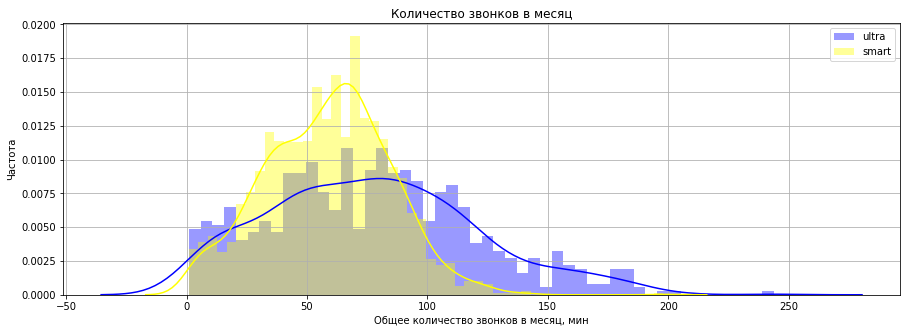

In [14]:
# формирование сводной таблицы
total_data_ultra = total_data.query('tariff == "ultra"')
calls_count_ultra = total_data_ultra.pivot_table(index=[ 'user_id', 'call_month'], values='duration', aggfunc={'count'})
display(calls_count_ultra)

# создание иллюстрации
fig = plt.figure(figsize=(15, 5))

# построение гистограммы
graph1 = sns.distplot(calls_count_ultra['count'], bins=50, color='blue')

#формирование сводной таблицы
total_data_smart = total_data.query('tariff == "smart"')
calls_count_smart = total_data_smart.pivot_table(index=[ 'user_id', 'call_month'], values='duration', aggfunc={'count'})
display(calls_count_smart)

# построение гистограммы
graph2 = sns.distplot(calls_count_smart['count'], bins=50, color='yellow', ax=graph1)
plt.title('Количество звонков в месяц')
graph1.set(xlabel='Общее количество звонков в месяц, мин', ylabel='Частота')
plt.grid(True)
graph1.legend(['ultra', 'smart'])
plt.show()

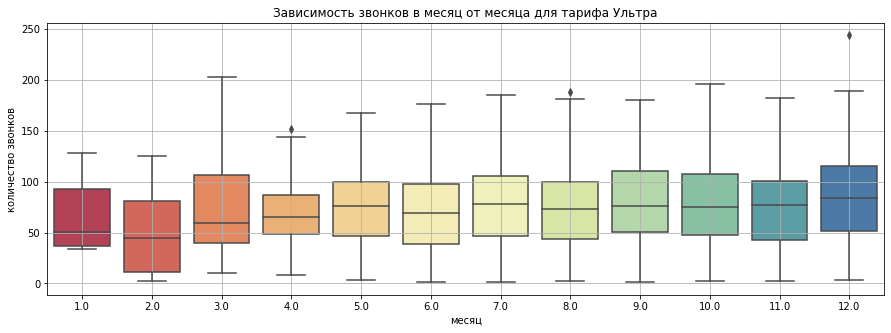

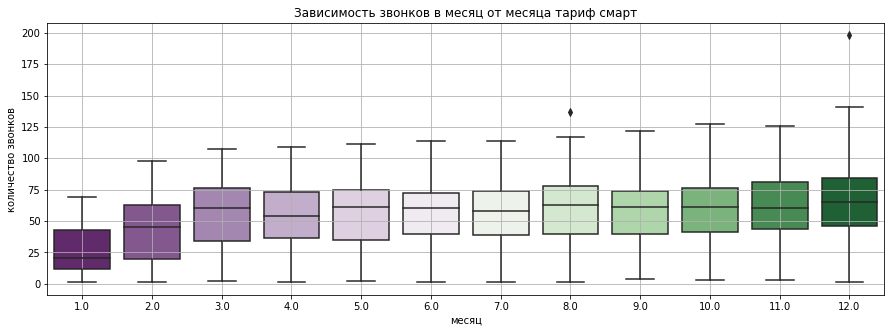

count    757.000000
mean      77.285337
std       43.258396
min        1.000000
25%       46.000000
50%       76.000000
75%      106.000000
max      244.000000
Name: count, dtype: float64

Дисперсия значения количества звонков для тарифа ультра равна 1868.8168655734503
Стандартное отклонение равно 43.22981454474967


count    1936.000000
mean       58.576446
std        25.740232
min         1.000000
25%        40.000000
50%        60.000000
75%        76.000000
max       198.000000
Name: count, dtype: float64

Дисперсия значения количества звонков для тарифа смарт равна 662.2172964619904
Стандартное отклонение равно 25.733583047488555


In [15]:
# анализ зависимости количества израсходованнных минут от месяца тариф ультра
box_calls_count_ultra= calls_count_ultra.reset_index()

# создание иллюстрации
fig = plt.figure(figsize=(15, 5))

graph= sns.boxplot(x = 'call_month', y = 'count', data= box_calls_count_ultra, palette='Spectral')
plt.title('Зависимость звонков в месяц от месяца для тарифа Ультра')
graph.set(xlabel='месяц', ylabel='количество звонков')
plt.grid(True)
plt.show()

# анализ зависимости количества израсходованнных минут от месяца тариф смарт
box_calls_count_smart= calls_count_smart.reset_index()

# создание иллюстрации
fig = plt.figure(figsize=(15, 5))

graph= sns.boxplot(x = 'call_month', y = 'count', data= box_calls_count_smart, palette= 'PRGn')
plt.title('Зависимость звонков в месяц от месяца тариф смарт')
graph.set(xlabel='месяц', ylabel='количество звонков')
plt.grid(True)
plt.show()

# Поиск среднего значения, дисперсии и стандартного отклонения 
display(box_calls_count_ultra['count'].describe())
print('Дисперсия значения количества звонков для тарифа ультра равна', np.var(box_calls_count_ultra['count']))
print('Стандартное отклонение равно', np.sqrt(np.var(box_calls_count_ultra['count'])))

# Поиск среднего значения, дисперсии и стандартного отклонения для тарифа смарт
display(box_calls_count_smart['count'].describe())
print('Дисперсия значения количества звонков для тарифа смарт равна', np.var(box_calls_count_smart['count']))
print('Стандартное отклонение равно', np.sqrt(np.var(box_calls_count_smart['count'])))

Как хорошо видно на гистограмме и подтверждается при вызове метода describe - общая продолжительность звонков в месяц в среднем для тарифа смарт равна 77, а для ультра - 59, что хорошо видно по стандартному отклонению и дисперсии для тарифа ультра этот разброс вокруг среднего значения незначительно уже, стандартное отклонение для тарифа смарт 43, для ултра 23 - то есть в тарифе смарт есть достаточно большое количество тех, кто общается чаще. На графиках зависимости количества звонков от месяцев видно, что для разных тарифов наблюдается одинаковая динамика звонков, незначительное снижение в начале месяца и рост к концу, это может быть связано с новогодними каникулами, когда люди предпочитают встречаться и снижается бизнес активность и коротким февралем.

<a id='the_destination14'></a>
### 3.1.2. Анализ количества израсходованных минут разговора в месяц

sum
user_id call_month        
1000.0  5.0         150.06
        6.0         158.90
        7.0         318.80
        8.0         389.87
        9.0         440.14
...                    ...
1495.0  8.0          87.03
        9.0         766.62
        10.0        971.33
        11.0        892.65
        12.0        970.94

[757 rows x 1 columns]

count     sum
user_id call_month               
1002.0  6.0            15  110.37
        7.0            26  204.75
        8.0            42  269.71
        9.0            36  195.85
        10.0           33  199.48
...                   ...     ...
1498.0  10.0           41  232.63
1499.0  9.0             9   64.65
        10.0           68  429.91
        11.0           74  576.50
        12.0           69  465.16

[1936 rows x 2 columns]

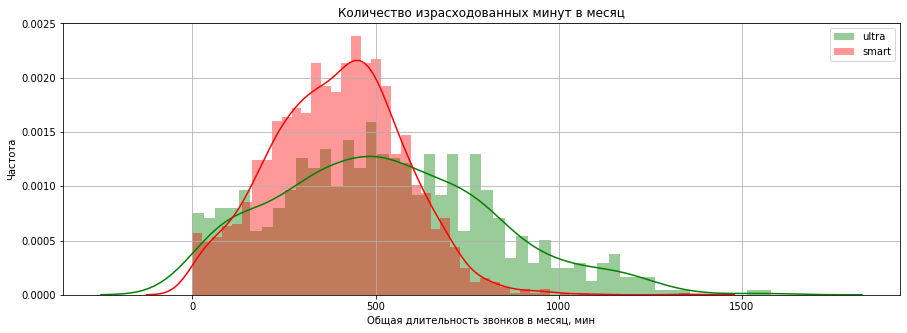

In [16]:
# формирование сводной таблицы
calls_and_minutes_ultra = total_data_ultra.pivot_table(index=[ 'user_id', 'call_month'], values='duration', aggfunc={'sum'})
display(calls_and_minutes_ultra)

# создание иллюстрации
fig = plt.figure(figsize=(15, 5))

# построение гистограммы
graph1 = sns.distplot(calls_and_minutes_ultra['sum'], bins=50, color='green')

# формирование своднойй таблицы
calls_and_minutes_smart = total_data_smart.pivot_table(index=[ 'user_id', 'call_month'], values='duration', aggfunc={'count', 'sum'})
display(calls_and_minutes_smart)

# построение гистограммы
graph2 = sns.distplot(calls_and_minutes_smart['sum'], bins=50, color='red', ax=graph1)
plt.title('Количество израсходованных минут в месяц')
graph1.set(xlabel='Общая длительность звонков в месяц, мин', ylabel='Частота')
plt.grid(True)
graph1.legend(['ultra', 'smart'])
plt.show()


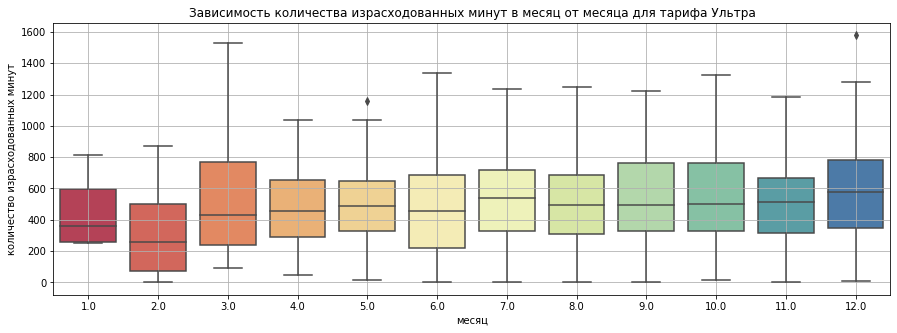

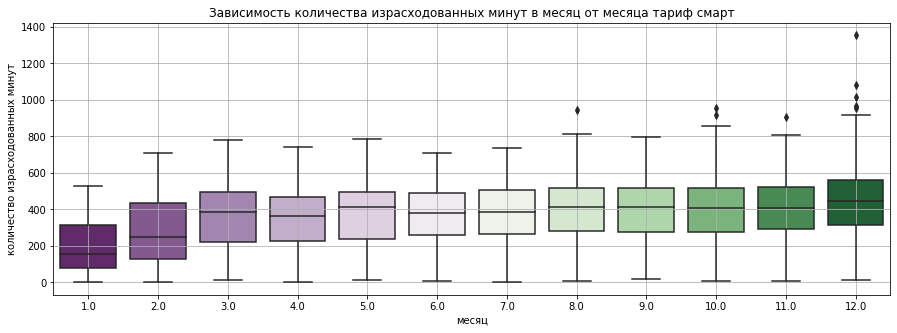

count     757.000000
mean      523.042391
std       295.336123
min         0.000000
25%       310.440000
50%       503.380000
75%       716.830000
max      1578.060000
Name: sum, dtype: float64

Дисперсия значения количества израсходованных минут для тарифа ультра равна 87108.2031421034
Стандартное отклонение равно 295.1409885835978


count    1936.000000
mean      395.323642
std       178.721742
min         0.000000
25%       267.762500
50%       400.755000
75%       515.702500
max      1354.220000
Name: sum, dtype: float64

Дисперсия значения количества израсходованных минут для тарифа смарт равна 31924.962439166953
Стандартное отклонение равно 178.67557874305865


In [17]:
# анализ зависимости количества израсходованнных минут от месяца тариф ультра
box_calls_and_minutes_ultra= calls_and_minutes_ultra.reset_index()
# создание иллюстрации
fig = plt.figure(figsize=(15, 5))
graph= sns.boxplot(x = 'call_month', y = 'sum', data= box_calls_and_minutes_ultra, palette='Spectral')
plt.title('Зависимость количества израсходованных минут в месяц от месяца для тарифа Ультра')
graph.set(xlabel='месяц', ylabel='количество израсходованных минут')
plt.grid(True)
plt.show()

# анализ зависимости количества израсходованнных минут от месяца тариф смарт
box_calls_and_minutes_smart= calls_and_minutes_smart.reset_index()
# создание иллюстрации
fig = plt.figure(figsize=(15, 5))
graph= sns.boxplot(x = 'call_month', y = 'sum', data= box_calls_and_minutes_smart, palette= 'PRGn')
plt.title('Зависимость количества израсходованных минут в месяц от месяца тариф смарт')
graph.set(xlabel='месяц', ylabel='количество израсходованных минут')
plt.grid(True)
plt.show()

# Поиск среднего значения, дисперсии и стандартного отклонения 
display(box_calls_and_minutes_ultra['sum'].describe())
print('Дисперсия значения количества израсходованных минут для тарифа ультра равна', np.var(box_calls_and_minutes_ultra['sum']))
print('Стандартное отклонение равно', np.sqrt(np.var(box_calls_and_minutes_ultra['sum'])))

# Поиск среднего значения, дисперсии и стандартного отклонения для тарифа смарт
display(box_calls_and_minutes_smart['sum'].describe())
print('Дисперсия значения количества израсходованных минут для тарифа смарт равна', np.var(box_calls_and_minutes_smart['sum']))
print('Стандартное отклонение равно', np.sqrt(np.var(box_calls_and_minutes_smart['sum'])))

Как хорошо видно на гистограмме и подтверждается при вызове метода describe - общая продолжительность звонков в месяц в среднем для тарифа смарт равна 523, а для ультра - 395, однако, что хорошо видно по стандартному отклонению и дисперсии для тарифа ультра этот разброс вокруг среднего значения существенно шире - есть достаточно большое количество тех, кто общается до 1000 мин в месяц. Такая динамика может быть связана с тем, что есть люди, которые покупают более дорогой тариф ради интернета и смс, а не общения. Обе гистограммы смещены влево относительно среднего значения, особенно хорошо это заметно на гистограмме для тарифа смарт, что говорит о том, что люди стараются не превышать лимита включенных минут. На графиках зависимости продолжительности звонков от месяцев видно, что для разных тарифов наблюдается одинаковая динамика расхода, незначительное снижение в начале месяца и рост к концу, также как и для общего количества звонков.

<a id='the_destination15'></a>
## 3.2. Анализ количества отравленных сообщений по месяцам 

count
user_id message_month       
1000.0  5.0               22
        6.0               60
        7.0               75
        8.0               81
        9.0               57
...                      ...
1495.0  8.0               13
        9.0               82
        10.0              82
        11.0              79
        12.0              84

[754 rows x 1 columns]

count
user_id message_month       
1002.0  6.0                4
        7.0               11
        8.0               13
        9.0                4
        10.0              10
...                      ...
1498.0  10.0              42
1499.0  9.0               11
        10.0              48
        11.0              59
        12.0              66

[1917 rows x 1 columns]

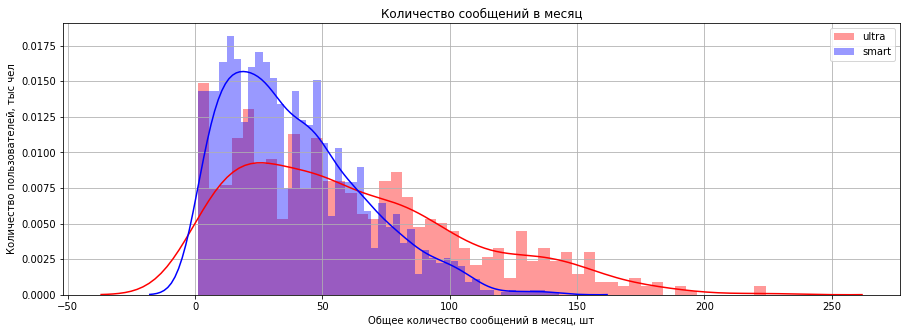

In [18]:
# формирование сводной таблицы
messages_count_ultra = total_data_ultra.pivot_table(index=[ 'user_id', 'message_month'], values='message_date', aggfunc={'count'})
display(messages_count_ultra)

# создание иллюстрации
fig = plt.figure(figsize=(15, 5))

# построение гистограммы
graph1 = sns.distplot(messages_count_ultra['count'], bins=50, color='red')

#формирование сводной таблицы
messages_count_smart = total_data_smart.pivot_table(index=[ 'user_id', 'message_month'], values='message_date', aggfunc={'count'})
display(messages_count_smart)

# построение гистограммы
graph2 = sns.distplot(messages_count_smart['count'], bins=50, color='blue', ax=graph1)
plt.title('Количество сообщений в месяц')
graph1.set(xlabel='Общее количество сообщений в месяц, шт', ylabel='Количество пользователей, тыс чел')
plt.grid(True)
graph1.legend(['ultra', 'smart'])
plt.show()

box_messages_ultra= messages_count_ultra.reset_index()
box_messages_smart= messages_count_smart.reset_index()

In [19]:
# Поиск среднего значения, дисперсии и стандартного отклонения 
display(messages_count_ultra['count'].describe())
print('Дисперсия значения количества сообщений для тарифа ультра равна', np.var(messages_count_ultra['count']))
print('Стандартное отклонение равно', np.sqrt(np.var(messages_count_ultra['count'])))

# Поиск среднего значения, дисперсии и стандартного отклонения для тарифа смарт
display(messages_count_smart['count'].describe())
print('Дисперсия значения количества сообщений для тарифа смарт равна', np.var(messages_count_smart['count']))
print('Стандартное отклонение равно', np.sqrt(np.var(messages_count_smart['count'])))

count    754.000000
mean      61.484085
std       44.860686
min        1.000000
25%       25.000000
50%       52.500000
75%       88.750000
max      224.000000
Name: count, dtype: float64

Дисперсия значения количества сообщений для тарифа ультра равна 2009.8120809264824
Стандартное отклонение равно 44.83092772770247


count    1917.000000
mean       38.752217
std        26.811229
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: count, dtype: float64

Дисперсия значения количества сообщений для тарифа смарт равна 718.4670334260437
Стандартное отклонение равно 26.80423536357722


По графикам и средним значениям видно, что количество сообщений посылаемых пользователями тарифа ультра значительно выше, пользователи тарифа смарт стараются не превышать лимита сообщений (среднее знчение равно 52, стандартное отклонение 44), пользователи тарифа ультра в основной своей массе пишут не менее 150 сообщений в месяц, однако количество сообщений не превышает 224. 

<a id='the_destination16'></a>
## 3.3 Анализ объема израсходованного интернет-трафика по месяцам

sum
user_id session_month          
1000.0  5.0             2253.49
        6.0            23233.77
        7.0            14003.64
        8.0            14055.93
        9.0            14568.91
...                         ...
1495.0  8.0             2614.07
        9.0            33067.62
        10.0           29363.00
        11.0           38939.11
        12.0           23426.76

[756 rows x 1 columns]

sum
user_id session_month          
1002.0  6.0            10856.82
        7.0            17580.10
        8.0            20319.26
        9.0            16691.08
        10.0           13888.25
...                         ...
1498.0  10.0           20579.36
1499.0  9.0             1845.75
        10.0           17788.51
        11.0           17963.31
        12.0           13055.58

[1936 rows x 1 columns]

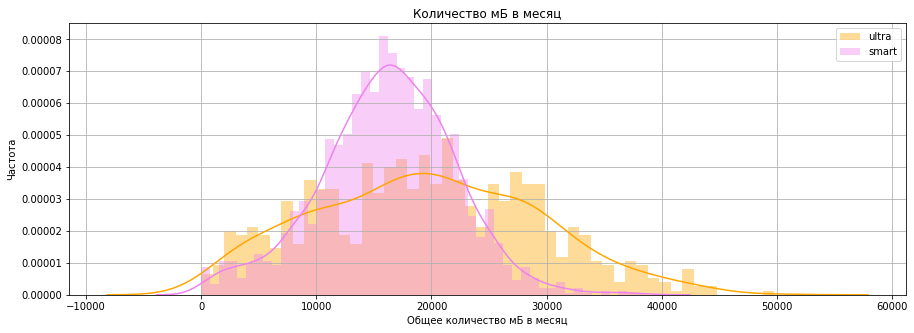

In [20]:
# формирование сводной таблицы
internet_sum_ultra = total_data_ultra.pivot_table(index=['user_id', 'session_month'], values='mb_used', aggfunc={'sum'})
display(internet_sum_ultra)

# создание иллюстрации
fig = plt.figure(figsize=(15, 5))
# построение гистограммы
graph1 = sns.distplot(internet_sum_ultra['sum'], bins=50, color='orange')

#формирование сводной таблицы
internet_sum_smart = total_data_smart.pivot_table(index=[ 'user_id', 'session_month'], values='mb_used', aggfunc={'sum'})
display(internet_sum_smart)

# построение гистограммы
graph2 = sns.distplot(internet_sum_smart['sum'], bins=50, color='violet', ax=graph1)
plt.title('Количество мБ в месяц')
graph1.set(xlabel='Общее количество мБ в месяц', ylabel='Частота')
plt.grid(True)
graph1.legend(['ultra', 'smart'])
plt.show()

box_internet_ultra= internet_sum_ultra.reset_index()
box_internet_smart= internet_sum_smart.reset_index()

In [21]:
# Поиск среднего значения, дисперсии и стандартного отклонения 
display(internet_sum_ultra['sum'].describe())
print('Дисперсия значения мБ для тарифа ультра равна', np.var(internet_sum_ultra['sum']))
print('Стандартное отклонение равно', np.sqrt(np.var(internet_sum_ultra['sum'])))

# Поиск среднего значения, дисперсии и стандартного отклонения для тарифа смарт
display(internet_sum_smart['sum'].describe())
print('Дисперсия значения мБ для тарифа смарт равна', np.var(internet_sum_smart['sum']))
print('Стандартное отклонение равно', np.sqrt(np.var(internet_sum_smart['sum'])))

count      756.000000
mean     19508.210926
std       9681.239159
min          0.000000
25%      11773.260000
50%      19432.885000
75%      26798.730000
max      49745.690000
Name: sum, dtype: float64

Дисперсия значения мБ для тарифа ультра равна 93602414.93760762
Стандартное отклонение равно 9674.834103880417


count     1936.000000
mean     16161.804148
std       5852.982926
min          0.000000
25%      12543.552500
50%      16368.600000
75%      20022.442500
max      38552.450000
Name: sum, dtype: float64

Дисперсия значения мБ для тарифа смарт равна 34239714.18675692
Стандартное отклонение равно 5851.471113041311


По гистограммам хорошо видно, что пользователи тарифа Смарт стараются не превышать лимит в 15 Гб (среднее 16 Гб), однако пользователи тарифа ультра в среднем также не превышают лимит в 19 Гб из 30 включенных, 75% пользователей используют не более 37 Гб. 

<a id='the_destination17'></a>
## 3.4 Расчет помесячной выручки с каждого пользователя

<a id='the_destination18'></a>
###  3.4.1 Анализ помесячной выручки для тарифа ультра

In [22]:
#создание сборной таблицы по данным расхода по месяцам
merged_table_ultra = total_data_ultra.pivot_table(index=['user_id', 'call_month'], values=['duration'], aggfunc={'sum', 'count'})
merged_table_ultra = merged_table_ultra.merge(box_messages_ultra, how='outer', left_on='user_id', right_on='user_id')
merged_table_ultra = merged_table_ultra.merge(box_internet_ultra, how='outer', left_on='user_id', right_on='user_id')
merged_table_ultra = merged_table_ultra.merge(users_data, how='left', left_on='user_id', right_on='user_id')

# замена названий столбцов
columns_names = ['user_id', 'duration_count', 'duration_sum', 'message_month','messages_count', 'session_month', 'mb_used','age', 'end_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff']
merged_table_ultra.set_axis(columns_names, axis='columns', inplace=True)
# добавление столбцов выгоды
merged_table_ultra['residue_ultra_calls'] = (merged_table_ultra['duration_count'] - 3000)
merged_table_ultra['residue_ultra_messages'] = (merged_table_ultra['duration_count'] -1000)
merged_table_ultra['residue_ultra_mb'] = (30000 - merged_table_ultra['mb_used'])/10000*150
# убираем отрицательные значения выгоды
merged_table_ultra['residue_ultra_calls'][merged_table_ultra['residue_ultra_calls'] < 0] = 0 
merged_table_ultra['residue_ultra_messages'][merged_table_ultra['residue_ultra_messages'] < 0] = 0 
merged_table_ultra['residue_ultra_mb'][merged_table_ultra['residue_ultra_mb'] < 0] = 0 


merged_table_ultra['total_residue'] = 1950 + merged_table_ultra['residue_ultra_mb'] + merged_table_ultra['residue_ultra_messages'] + merged_table_ultra['residue_ultra_calls']
merged_table_ultra.reset_index()

display(merged_table_ultra.head())

,user_id,duration_count,duration_sum,message_month,messages_count,session_month,mb_used,age,end_date,city,first_name,last_name,reg_date,tariff,residue_ultra_calls,residue_ultra_messages,residue_ultra_mb,total_residue
0,1000,22,150.06,5.0,22,5.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,416.19765,2366.19765
1,1000,22,150.06,5.0,22,6.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,101.49345,2051.49345
2,1000,22,150.06,5.0,22,7.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,239.94540,2189.94540
3,1000,22,150.06,5.0,22,8.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,239.16105,2189.16105
4,1000,22,150.06,5.0,22,9.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,231.46635,2181.46635


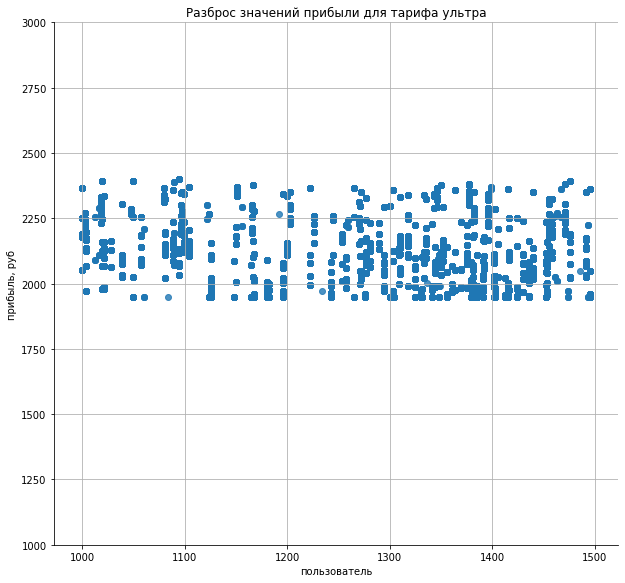

In [23]:
# построение графика 
graph_residue =sns.lmplot(y='total_residue', x='user_id', data=merged_table_ultra, fit_reg=False, height=8, aspect=1.1)
plt.title('Разброс значений прибыли для тарифа ультра')
graph_residue.set(xlabel='пользователь', ylabel='прибыль, руб')
graph_residue.set(ylim=(1000, 3000))
plt.grid(True)
plt.show()

In [24]:
merged_table_ultra['total_residue'].describe()

count    55156.000000
mean      2113.156762
std        124.034751
min       1950.000000
25%       1992.253200
50%       2108.114100
75%       2200.303800
max       2400.000000
Name: total_residue, dtype: float64

На представленном графике и анализе данных методом decribe хорошо видно, что средняя прибыль по тарифу ультра составит 2113 руб , максимально - 2400 руб, несмотря на то, что большинство пользователей не используют польностью одни или другие лимиты сообщений и звонков, но в целом большая часть пользователей тратит более 1950 руб, только 25% пользователей тратит мнее 1992 руб. Средняя прибыль сверх платы за тариф составит 163 руб (8,3%).  

<a id='the_destination19'></a>
### 3.4.2 Анализ помесячной выручки для тарифа смарт

In [25]:
#создание сборной таблицы по данным расхода по месяцам
merged_table_smart = total_data_smart.pivot_table(index=['user_id', 'call_month'], values=['duration'], aggfunc={'sum', 'count'})
merged_table_smart = merged_table_smart.merge(box_messages_smart, how='outer', left_on='user_id', right_on='user_id')
merged_table_smart = merged_table_smart.merge(box_internet_smart, how='outer', left_on='user_id', right_on='user_id')
merged_table_smart = merged_table_smart.merge(users_data, how='left', left_on='user_id', right_on='user_id')

# замена названий столбцов
columns_names = ['user_id', 'duration_count', 'duration_sum', 'message_month','messages_count', 'session_month', 'mb_used', 'age', 'end_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff']
merged_table_smart.set_axis(columns_names, axis='columns', inplace=True)
# добавление столбцов выгоды
merged_table_smart['residue_smart_calls'] = (merged_table_smart['duration_count'] - 500)*3
merged_table_smart['residue_smart_messages'] = (merged_table_smart['duration_count'] - 50)
merged_table_smart['residue_smart_mb'] = (15000 - merged_table_smart['mb_used'])/10000*200
# убираем отрицательные значения выгоды
merged_table_smart['residue_smart_calls'][merged_table_smart['residue_smart_calls'] < 0] = 0 
merged_table_smart['residue_smart_messages'][merged_table_smart['residue_smart_messages'] < 0] = 0 
merged_table_smart['residue_smart_mb'][merged_table_smart['residue_smart_mb'] < 0] = 0 


merged_table_smart['total_residue'] = (550 + merged_table_smart['residue_smart_mb'] + merged_table_smart['residue_smart_messages'] + merged_table_smart['residue_smart_calls'])
merged_table_smart.reset_index()


,index,user_id,duration_count,duration_sum,message_month,messages_count,session_month,mb_used,age,end_date,city,first_name,last_name,reg_date,tariff,residue_smart_calls,residue_smart_messages,residue_smart_mb,total_residue
0,0,1002,15,110.37,6.0,4,6.0,10856.82,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0,0,82.8636,632.8636
1,1,1002,15,110.37,6.0,4,7.0,17580.10,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0,0,0.0000,550.0000
2,2,1002,15,110.37,6.0,4,8.0,20319.26,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0,0,0.0000,550.0000
3,3,1002,15,110.37,6.0,4,9.0,16691.08,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0,0,0.0000,550.0000
4,4,1002,15,110.37,6.0,4,10.0,13888.25,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0,0,22.2350,572.2350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147783,147783,1499,69,465.16,11.0,59,12.0,13055.58,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,19,38.8884,607.8884
147784,147784,1499,69,465.16,12.0,66,9.0,1845.75,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,19,263.0850,832.0850
147785,147785,1499,69,465.16,12.0,66,10.0,17788.51,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,19,0.0000,569.0000
147786,147786,1499,69,465.16,12.0,66,11.0,17963.31,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,0,19,0.0000,569.0000


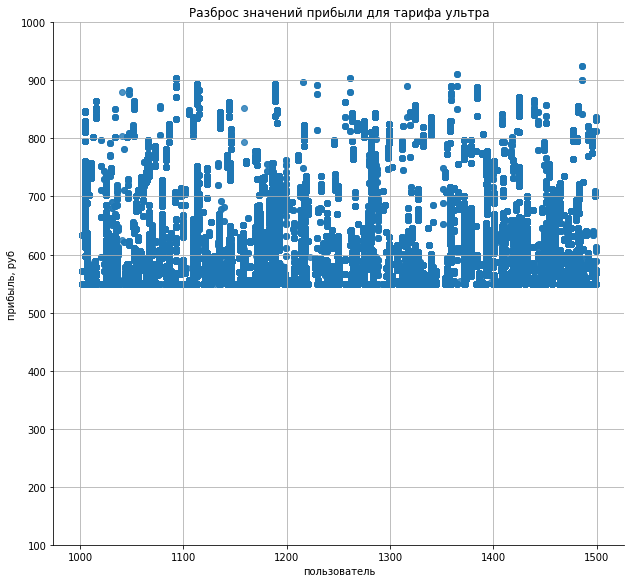

In [26]:
# построение графика 

graph_residue =sns.lmplot(y='total_residue', x='user_id', data=merged_table_smart, fit_reg=False,  height=8, aspect=1.1)
plt.title('Разброс значений прибыли для тарифа ультра')
graph_residue.set(xlabel='пользователь', ylabel='прибыль, руб')
graph_residue.set(ylim=(100, 1000))
plt.grid(True)
plt.show()

In [27]:
merged_table_smart['total_residue'].describe()

count    147788.000000
mean        599.641321
std          63.218269
min         550.000000
25%         555.000000
50%         577.000000
75%         615.964800
max         924.846800
Name: total_residue, dtype: float64

На представленном графике и анализе данных методом decribe хорошо видно, что средняя прибыль по тарифу ультра составит 600 руб, максимально - 924 руб, несмотря на то, что большинство пользователей не используют польностью одни или другие лимиты сообщений и звонков, но в целом большая часть пользователей тратит более 550 руб, только 25% пользователей тратит менее 555 руб. Средняя прибыль сверх платы за тариф составит 50 руб (9%).

Надо отметить, что для пользователей тариф ультра оказывается менее выгодным, так как переплачивая за неиспользованные гБ, звонки и сообщения они также превышают лимиты использования и доплачивают сверх тарифа.

<a id='the_destination20'></a>
# 4. Проверка гипотез

<a id='the_destination21'></a>
## 4.1. Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Начнём с формулировки нулевой гипотезы H₀ - "средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая". Уровень значимости для этой гипотезы установим как 0,05. Для оценки справедливости этой гипотезы воспользуемся методом scipy.stats.ttest_ind(), который применяется для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.Критические значения задаются выбранным уровнем значимости проверки гипотезы, установим его равным 5%.

In [28]:
sample_1 = merged_table_ultra['total_residue']
sample_2 = merged_table_smart['total_residue']


alpha = 0.05 # критический уровень значимости 

results = st.ttest_ind(sample_1, sample_2, equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтверждена, соответственно гипотеза опровергнута, средняя выручка по тарифу ультра отличается от тарифа смарт.

<a id='the_destination22'></a>
## 4.2. Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Начнём с формулировки нулевой гипотезы H₀ - "средняя выручка пользователей из Москвы и регионов одинаковая". Уровень значимости для этой гипотезы установим как 0,05. Для оценки справедливости этой гипотезы воспользуемся методом scipy.stats.ttest_ind(), который применяется для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.Критические значения задаются выбранным уровнем значимости проверки гипотезы, установим его равным 5%.

In [29]:
sample_1 = merged_table_ultra[merged_table_ultra['city'] == "Москва"]
sample_2 = merged_table_ultra[merged_table_ultra['city'] != "Москва"]

alpha = 0.05 # критический уровень значимости 

results = st.ttest_ind(sample_1['total_residue'], sample_2['total_residue'], equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
sample_3 = merged_table_smart.query('city == "Москва"')
sample_4 = merged_table_smart.query('city != "Москва"')

alpha = 0.05 # критический уровень значимости 

results = st.ttest_ind(sample_3['total_residue'], sample_4['total_residue'], equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу
p-значение: 1.209212833389606e-28
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтверждена, соответственно гипотеза опровергнута, средняя выручка по пользователям из Москвы не отличается значимо от пользователей регионов.

<a id='the_destination23'></a>
# 5. Общий вывод

Были проанализированы данные по двум тарифам.
Как показал анализ - тарифы смарт и ультра отличаются по средней выручке для компании, тариф ультра приносит большую выручку в числовом значении, однако в процентном отношении тариф ультра незначительно выгоднее. Выручка не зависит от региона пользователя. Пользователи незначительно меньше используют связь в начале года и чуть больше осенью. Несмотря на то, что в общей массе тариф ультра дает большую выручку, однако тариф ультра имеет большие перспективы развития. Пользователям он предпочтителен, по сравнению с тарифом ультра, в связи с меньшими остатками неиспользованных смс, звонков и мБ, также общая плата на тарифе ниже, поэтому вероятно им предпочтут пользоваться больше людей, а так как в % отношении доход от него выше - то целесообразно развивать этот тариф или предложить пользователям более дешевую вариацию тарифа ультра. 